In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs, feature
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as mcm
import pandas as pd
import glob
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import gstools as gs


%matplotlib inline

In [2]:
landcolour = 'lightgrey'
plt.rcParams['font.size'] = 15

In [3]:
SalishSeaDF=pd.read_excel('/ocean/ksuchy/MOAD/analysis-karyn/notebooks/SalishSeaBiomassDF.xlsx',engine='openpyxl')

In [4]:
SalishSeaDF

,Unnamed: 0,Unnamed: 0.1,Key,region_name,Lat,Lon,Date,Z_lower,Z_upper,dtUTC,...,Month,Total mg m2,Copepods mg m2,Amphipods mg m2,Euphausiids mg m2,MainGroups mg m2,Gastropods mg m2,Chaetognaths mg m2,Crabs mg m2,Larvaceans mg m2
0,0,0,010218ELIV1151,Bellingham Bay,48.63795,-122.5694,2018-01-02 00:00:00,110.0,0,2018-01-02 19:51:00,...,1,1340.894852,337.172180,598.206265,7.390319,1340.894852,0.000000,55.816795,134.549317,207.759975
1,1,1,010818SKETV1058,South Sound,47.15243,-122.6586,2018-01-08 00:00:00,122.0,0,2018-01-08 18:58:00,...,1,4277.293955,180.914387,915.701196,0.000000,4275.555936,1.738019,0.000000,594.194459,2584.745895
2,2,2,011119ELIV1052,Bellingham Bay,48.63795,-122.5694,2019-01-11 00:00:00,114.0,0,2019-01-11 18:52:00,...,1,969.788240,349.676157,507.561648,0.000000,895.682925,74.105315,38.445120,0.000000,0.000000
3,3,3,011315CAMV1330,Whidbey Basin,48.05901,-122.3873,2015-01-13 00:00:00,170.0,0,2015-01-13 21:30:00,...,1,2569.563889,1260.193200,1083.945413,0.000000,2561.215732,8.348156,0.687165,216.389955,0.000000
4,4,4,011315MUKV1415,Whidbey Basin,47.97166,-122.3222,2015-01-13 00:00:00,190.0,0,2015-01-13 22:15:00,...,1,5058.337412,1031.628329,2985.483334,0.000000,5048.844311,9.493101,121.004332,463.643507,447.084810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,2500,1341,UBC9999099001401,Juan de Fuca,48.30000,-124.0000,8/27/2018,104.0,0,2018-08-28 01:45:00,...,8,2105.913888,517.013640,84.923748,308.165364,1665.089244,0.000000,1526.019040,73.073520,15.144480
2501,2501,1342,UBC9999099001601,Central Strait of Georgia,49.22800,-123.4700,8/30/2016,309.0,0,2016-08-30 19:00:00,...,8,12714.663866,1807.430301,6917.200767,318.866679,10081.771582,36.959490,2511.134850,9.600012,13.696425
2502,2502,1343,UBC9999099001801,Central Strait of Georgia,49.25000,-123.6670,12/4/2017,375.0,0,2017-12-04 20:00:00,...,12,2782.967625,1398.681000,369.751500,101.400188,1905.940125,258.697500,85.597500,21.215250,0.000000
2503,2503,1344,UBC9999099001901,Central Strait of Georgia,49.25000,-123.6670,1/15/2018,375.0,0,2018-01-15 20:00:00,...,1,3260.045813,1552.132125,840.538687,82.147500,2532.559500,27.716250,142.661250,4.279500,2.640938


In [5]:
SalishSeaDF['YrMo'] = pd.to_datetime(SalishSeaDF['Date']).dt.strftime('%Y-%m')

In [6]:
SalishSeaDF['RLat']=np.round(SalishSeaDF['Lat'],3) #3 = 3 decimal places ~100metres

In [7]:
SalishSeaDF['RLon']=np.round(SalishSeaDF['Lon'],3)

In [8]:
SalishSeaDF['RLon'][0]

-122.569

In [9]:
monthlymean=SalishSeaDF.groupby(['YrMo','RLon','RLat']).mean()
#monthlymean=SalishSeaDF.groupby('Month').mean()

In [10]:
monthlymean

Unnamed: 0  Unnamed: 0.1       Lat       Lon  \
YrMo    RLon     RLat                                                   
2012-05 -124.501 49.467      1200.5          41.5  49.46700 -124.5010   
        -124.081 49.367      1206.5          47.5  49.36700 -124.0810   
        -123.754 49.248      1214.0          55.0  49.24800 -123.7540   
        -123.753 49.248      1215.0          56.0  49.24800 -123.7530   
                 49.249      1213.0          54.0  49.24900 -123.7530   
...                             ...           ...       ...       ...   
2019-12 -122.433 47.533      1136.0        1136.0  47.53333 -122.4333   
        -122.428 47.744      1134.0        1134.0  47.74396 -122.4282   
        -122.387 47.359      1137.0        1137.0  47.35862 -122.3871   
                 48.059      1127.0        1127.0  48.05901 -122.3873   
        -122.322 47.972      1128.0        1128.0  47.97166 -122.3222   

                            Z_lower     Z_upper    Year     YD      Total  \
YrMo    RLon     RLat                                                       
2012-05 -124.501 49.467  204.166667  100.000000  2012.0  142.0  78.060319   
        -124.081 49.367  157.500000   79.166667  2012.0  142.0  31.772870   
        -123.754 49.248  100.000000   50.000000  2012.0  142.0  38.465798   
        -123.753 49.248   50.000000    0.000000  2012.0  142.0  34.001455   
                 49.249  150.000000  100.000000  2012.0  142.0  20.729201   
...                             ...         ...     ...    ...        ...   
2019-12 -122.433 47.533  200.000000    0.000000  2019.0  345.0  43.861895   
        -122.428 47.744  200.000000    0.000000  2019.0  353.0  43.411348   
        -122.387 47.359  170.000000    0.000000  2019.0  345.0  69.125397   
                 48.059  155.000000    0.000000  2019.0  336.0  37.454104   
        -122.322 47.972  190.000000    0.000000  2019.0  336.0  52.220024   

                          Copepods  ...  Month   Total mg m2  Copepods mg m2  \
YrMo    RLon     RLat               ...                                        
2012-05 -124.501 49.467  41.736958  ...    5.0  17789.345899    10963.391824   
        -124.081 49.367   7.660079  ...    5.0   4412.960381     1319.255164   
        -123.754 49.248   9.566024  ...    5.0   3846.579750      956.602350   
        -123.753 49.248   6.702390  ...    5.0   1700.072775      335.119500   
                 49.249  10.078304  ...    5.0   3109.380075     1511.745525   
...                            ...  ...    ...           ...             ...   
2019-12 -122.433 47.533   8.498876  ...   12.0   8772.378925     1699.775244   
        -122.428 47.744  15.196317  ...   12.0   8682.269649     3039.263465   
        -122.387 47.359   4.406087  ...   12.0  11751.317528      749.034790   
                 48.059   6.820389  ...   12.0   5805.386140     1057.160223   
        -122.322 47.972  16.357392  ...   12.0   9921.804652     3107.904422   

                         Amphipods mg m2  Euphausiids mg m2  MainGroups mg m2  \
YrMo    RLon     RLat                                                           
2012-05 -124.501 49.467      1984.030695        2070.716156      15598.019602   
        -124.081 49.367       496.665109        1288.026893       3210.045154   
        -123.754 49.248       361.633950        2054.533500       3468.558600   
        -123.753 49.248        84.064950         141.579900        589.517325   
                 49.249       746.358300         402.648975       2589.441075   
...                                  ...                ...               ...   
2019-12 -122.433 47.533      1935.977566           0.000000       8758.419307   
        -122.428 47.744      1757.053374          10.841171       8534.464000   
        -122.387 47.359       485.766910           0.000000      11747.079452   
                 48.059      2661.990816           0.000000       5144.005398   
        -122.322 47.972       727.622321           0.000000 

In [11]:
Mar2014=monthlymean.loc['2014-03'].reset_index()
Mar2015=monthlymean.loc['2015-03'].reset_index()
Mar2016=monthlymean.loc['2016-03'].reset_index()
Mar2017=monthlymean.loc['2017-03'].reset_index()
Mar2018=monthlymean.loc['2018-03'].reset_index()
Mar2019=monthlymean.loc['2019-03'].reset_index()

May2014=monthlymean.loc['2014-05'].reset_index()
May2015=monthlymean.loc['2015-05'].reset_index()
May2016=monthlymean.loc['2016-05'].reset_index()
May2017=monthlymean.loc['2017-05'].reset_index()
May2018=monthlymean.loc['2018-05'].reset_index()
May2019=monthlymean.loc['2019-05'].reset_index()

In [25]:
May2017

,RLon,RLat,Unnamed: 0,Unnamed: 0.1,Lat,Lon,Z_lower,Z_upper,Year,YD,...,Month,Total mg m2,Copepods mg m2,Amphipods mg m2,Euphausiids mg m2,MainGroups mg m2,Gastropods mg m2,Chaetognaths mg m2,Crabs mg m2,Larvaceans mg m2
0,-124.768,49.484,1934.000000,775.000000,49.48400,-124.7680,50.000000,0.0,2017.0,131.000000,...,5.0,5114.612925,638.204850,184.366575,587.644200,1843.230150,391.015500,736.172500,147.097350,175.956750
1,-124.725,49.707,1944.000000,785.000000,49.70700,-124.7250,290.000000,0.0,2017.0,142.000000,...,5.0,9360.008100,3678.261255,550.605600,882.963000,6110.357130,428.002300,361.354500,872.430345,119.963430
2,-124.724,49.706,1933.000000,774.000000,49.70600,-124.7240,280.000000,0.0,2017.0,131.000000,...,5.0,26794.265400,4512.105360,1243.849320,11479.919220,18759.803580,2368.990400,595.576800,1308.400380,158.284980
3,-124.287,49.655,2436.500000,1277.500000,49.65500,-124.2870,149.500000,0.0,2017.0,137.500000,...,5.0,3996.010661,894.549539,284.485084,255.038366,1602.540662,470.503935,145.709550,129.120599,226.499044
4,-124.274,49.670,1932.000000,773.000000,49.67000,-124.2740,343.000000,0.0,2017.0,130.000000,...,5.0,11139.598481,2920.234086,1772.844035,813.342694,6381.315202,634.433380,199.433920,840.407967,248.367672
5,-124.271,49.666,1945.000000,786.000000,49.66600,-124.2710,245.000000,0.0,2017.0,142.000000,...,5.0,8367.576997,2113.354688,907.928595,1353.380490,4692.302843,1188.472950,86.036650,417.021727,240.052838
6,-124.155,49.575,2435.500000,1276.500000,49.57500,-124.1550,149.500000,0.0,2017.0,137.500000,...,5.0,5670.637110,1023.943603,527.093100,313.989358,2764.386128,545.288585,65.813725,908.155417,253.233324
7,-124.083,49.637,2437.500000,1278.500000,49.63700,-124.0830,30.000000,0.0,2017.0,137.500000,...,5.0,2523.683187,213.077169,12.253410,22.646223,242.790003,46.803740,9.336700,5.443164,73.871982
8,-123.753,49.257,1943.000000,784.000000,49.25700,-123.7530,392.000000,0.0,2017.0,141.000000,...,5.0,8446.247208,2809.418724,1274.253624,1085.784336,5797.775844,1223.514320,267.830080,547.411536,80.574228
9,-123.743,49.246,1931.000000,772.000000,49.24600,-123.7430,390.000000,0.0,2017.0,129.000000,...,5.0,13047.221070,3905.162820,1214.995275,1815.561540,7383.695670,3044.889900,232.923600,443.514825,94.520790


In [24]:
May2015.max()

RLon                   -122.322000
RLat                     49.706000
Unnamed: 0             2329.000000
Unnamed: 0.1           1170.000000
Lat                      49.706000
Lon                    -122.322200
Z_lower                 415.000000
Z_upper                   0.000000
Year                   2015.000000
YD                      147.000000
Total                   445.292377
Copepods                 30.702231
Amphipods               144.819636
Euphausiids              71.787933
MainGroups              445.265810
Gastropods               75.099220
Chaetognaths             19.928420
Crabs                   166.627365
Larvaceans              312.961754
Month                     5.500000
Total mg m2           52664.709390
Copepods mg m2        10919.239695
Amphipods mg m2       16779.787996
Euphausiids mg m2     10122.098553
MainGroups mg m2      52661.574255
Gastropods mg m2       8295.739700
Chaetognaths mg m2     2889.620900
Crabs mg m2           19924.184547
Larvaceans mg m2    

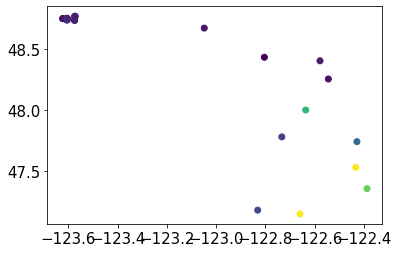

In [13]:
plt.scatter(May2014['RLon'],May2014['RLat'],c=May2014['Total mg m2'])

In [14]:
Mar2014.keys()

Index(['RLon', 'RLat', 'Unnamed: 0', 'Unnamed: 0.1', 'Lat', 'Lon', 'Z_lower',
       'Z_upper', 'Year', 'YD', 'Total', 'Copepods', 'Amphipods',
       'Euphausiids', 'MainGroups', 'Gastropods', 'Chaetognaths', 'Crabs',
       'Larvaceans', 'Month', 'Total mg m2', 'Copepods mg m2',
       'Amphipods mg m2', 'Euphausiids mg m2', 'MainGroups mg m2',
       'Gastropods mg m2', 'Chaetognaths mg m2', 'Crabs mg m2',
       'Larvaceans mg m2'],
      dtype='object')

In [15]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)

In [16]:
MarTotal2014=Mar2014['Total mg m2']
MarTotal2015=Mar2015['Total mg m2']
MarTotal2016=Mar2016['Total mg m2']
MarTotal2017=Mar2017['Total mg m2']
MarTotal2018=Mar2018['Total mg m2']
MarTotal2019=Mar2019['Total mg m2']

MarLon2014=Mar2014['RLon']
MarLon2015=Mar2015['RLon']
MarLon2016=Mar2016['RLon']
MarLon2017=Mar2017['RLon']
MarLon2018=Mar2018['RLon']
MarLon2019=Mar2019['RLon']

MarLat2014=Mar2014['RLat']
MarLat2015=Mar2015['RLat']
MarLat2016=Mar2016['RLat']
MarLat2017=Mar2017['RLat']
MarLat2018=Mar2018['RLat']
MarLat2019=Mar2019['RLat']



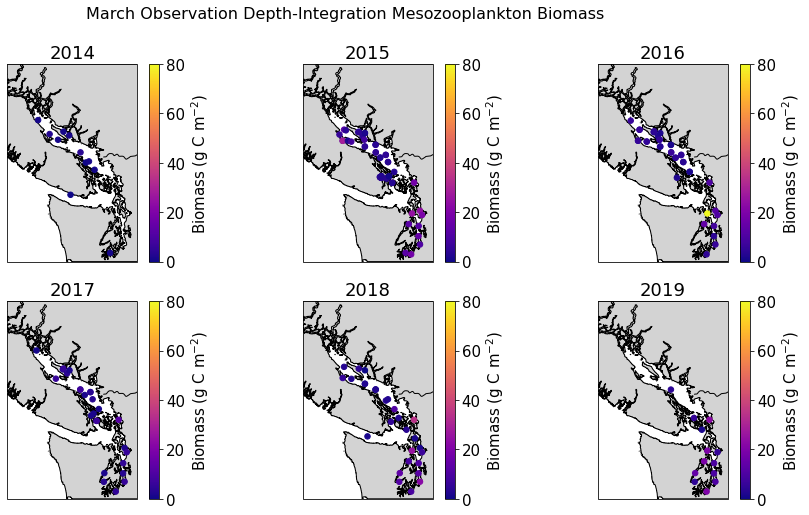

In [26]:
vmax=80
normalize = colors.Normalize(vmin=0, vmax=vmax)
xlim, ylim = [-126., -122.], [47., 51.]

fig,ax=plt.subplots(2,3,figsize=(15,8),subplot_kw={'projection':crs.Mercator(np.mean(xlim), *ylim)})

fig.suptitle('March Observation Depth-Integration Mesozooplankton Biomass', fontsize=16)



ax[0,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,0].scatter(MarLon2014,MarLat2014,c=MarTotal2014/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,0]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[0,0].set_title("2014");

ax[0,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,1].scatter(MarLon2015,MarLat2015,c=MarTotal2015/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,1]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[0,1].set_title("2015");

ax[0,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,2].scatter(MarLon2016,MarLat2016,c=MarTotal2016/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,2]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[0,2].set_title("2016");

ax[1,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,0].scatter(MarLon2017,MarLat2017,c=MarTotal2017/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,0]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[1,0].set_title("2017");

ax[1,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,1].scatter(MarLon2018,MarLat2018,c=MarTotal2018/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,1]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[1,1].set_title("2018");


ax[1,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,2].scatter(MarLon2019,MarLat2019,c=MarTotal2019/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,2]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[1,2].set_title("2019");

In [18]:
MayTotal2014=May2014['Total mg m2']
MayTotal2015=May2015['Total mg m2']
MayTotal2016=May2016['Total mg m2']
MayTotal2017=May2017['Total mg m2']
MayTotal2018=May2018['Total mg m2']
MayTotal2019=May2019['Total mg m2']

MayLon2014=May2014['RLon']
MayLon2015=May2015['RLon']
MayLon2016=May2016['RLon']
MayLon2017=May2017['RLon']
MayLon2018=May2018['RLon']
MayLon2019=May2019['RLon']

MayLat2014=May2014['RLat']
MayLat2015=May2015['RLat']
MayLat2016=May2016['RLat']
MayLat2017=May2017['RLat']
MayLat2018=May2018['RLat']
MayLat2019=May2019['RLat']



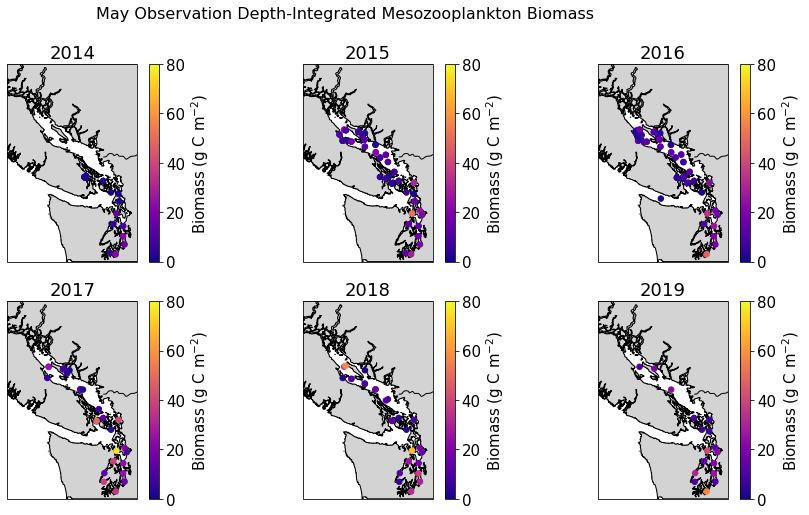

In [27]:
vmax=80
normalize = colors.Normalize(vmin=0, vmax=vmax)
xlim, ylim = [-126., -122.], [47., 51.]

fig,ax=plt.subplots(2,3,figsize=(15,8),subplot_kw={'projection':crs.Mercator(np.mean(xlim), *ylim)})
fig.suptitle('May Observation Depth-Integrated Mesozooplankton Biomass', fontsize=16)




ax[0,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,0].scatter(MayLon2014,MayLat2014,c=MayTotal2014/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,0]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[0,0].set_title("2014");

ax[0,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,1].scatter(MayLon2015,MayLat2015,c=MayTotal2015/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,1]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[0,1].set_title("2015");

ax[0,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,2].scatter(MayLon2016,MayLat2016,c=MayTotal2016/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,2]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[0,2].set_title("2016");

ax[1,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,0].scatter(MayLon2017,MayLat2017,c=MayTotal2017/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,0]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[1,0].set_title("2017");

ax[1,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,1].scatter(MayLon2018,MayLat2018,c=MayTotal2018/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,1]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[1,1].set_title("2018");


ax[1,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,2].scatter(MayLon2019,MayLat2019,c=MayTotal2019/1000,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,2]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[1,2].set_title("2019");

In [28]:
Winter=monthlymean.loc[(monthlymean.Month==12)|(monthlymean.Month==1)|(monthlymean.Month==2)]
Spring=monthlymean.loc[(monthlymean.Month==3)|(monthlymean.Month==4)|(monthlymean.Month==5)]
Summer=monthlymean.loc[(monthlymean.Month==6)|(monthlymean.Month==7)|(monthlymean.Month==8)]
Autumn=monthlymean.loc[(monthlymean.Month==9)|(monthlymean.Month==10)|(monthlymean.Month==11)]



In [30]:
WinterTotal=Winter['Total mg m2']
SpringTotal=Spring['Total mg m2']
SummerTotal=Summer['Total mg m2']
AutumnTotal=Autumn['Total mg m2']

WinterLon=Winter['Lon']
SpringLon=Spring['Lon']
SummerLon=Summer['Lon']
AutumnLon=Autumn['Lon']

WinterLat=Winter['Lat']
SpringLat=Spring['Lat']
SummerLat=Summer['Lat']
AutumnLat=Autumn['Lat']

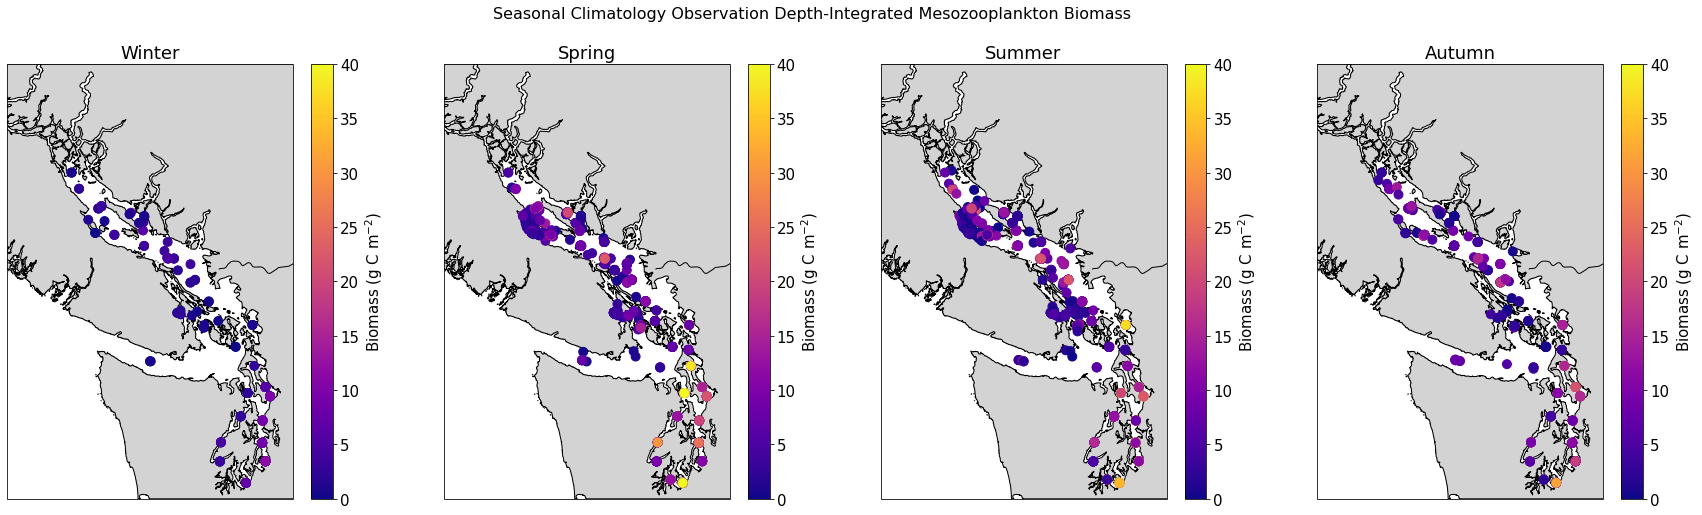

In [31]:

fig,ax=plt.subplots(1,4,figsize=(30,8),subplot_kw={'projection':crs.Mercator(np.mean(xlim), *ylim)})
fig.suptitle('Seasonal Climatology Observation Depth-Integrated Mesozooplankton Biomass', fontsize=16)


vmax=40
normalize = colors.Normalize(vmin=0, vmax=vmax)
xlim, ylim = [-126., -122.], [47., 51.]

ax[0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0].scatter(WinterLon,WinterLat,c=WinterTotal/1000,marker='o', s=80, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[0].set_title("Winter");

ax[1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1].scatter(SpringLon,SpringLat,c=SpringTotal/1000,marker='o', s=80, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[1].set_title("Spring");

ax[2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[2].scatter(SummerLon,SummerLat,c=SummerTotal/1000,marker='o', s=80, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[2]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[2].set_title("Summer");

ax[3].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[3].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[3].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[3].scatter(AutumnLon,AutumnLat,c=AutumnTotal/1000,marker='o', s=80, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[3]) 
cb.set_label('Biomass (g C m$^{-2}$)')
ax[3].set_title("Autumn");